<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Tensorflow-기반-분류-모델" data-toc-modified-id="1.-Tensorflow-기반-분류-모델-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. Tensorflow 기반 분류 모델</a></span></li><li><span><a href="#2.-Parameters/Weights" data-toc-modified-id="2.-Parameters/Weights-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Parameters/Weights</a></span></li><li><span><a href="#3.-활성화-함수-(Activation-Functions)" data-toc-modified-id="3.-활성화-함수-(Activation-Functions)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. 활성화 함수 (Activation Functions)</a></span></li><li><span><a href="#4.-손실함수-(Loss-Functions)" data-toc-modified-id="4.-손실함수-(Loss-Functions)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. 손실함수 (Loss Functions)</a></span></li><li><span><a href="#5.-경사하강법(Gradient-Descent)" data-toc-modified-id="5.-경사하강법(Gradient-Descent)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>5. 경사하강법(Gradient Descent)</a></span></li><li><span><a href="#6.-오차역전파법(Backpropagation)" data-toc-modified-id="6.-오차역전파법(Backpropagation)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>6. 오차역전파법(Backpropagation)</a></span></li><li><span><a href="#7.-모델-학습-Step-by-Step" data-toc-modified-id="7.-모델-학습-Step-by-Step-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>7. 모델 학습 Step-by-Step</a></span></li><li><span><a href="#8.-추론-과정-구현과-정확도(Accuracy)-계산" data-toc-modified-id="8.-추론-과정-구현과-정확도(Accuracy)-계산-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>8. 추론 과정 구현과 정확도(Accuracy) 계산</a></span></li><li><span><a href="#9.-전체-학습-사이클-수행" data-toc-modified-id="9.-전체-학습-사이클-수행-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>9. 전체 학습 사이클 수행</a></span></li></ul></div>

# 딥러닝 들여다보기 <a class="tocSkip">

# 1. Tensorflow 기반 분류 모델
딥러닝 프레임워크를 이용하면 몇 줄 안되는 코드만으로 MNIST 데이터셋을 99% 이상의 정확도로 분류할 수 있는 이미지 분류기를 만들 수 있습니다.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5001 - accuracy: 0.8813
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2288 - accuracy: 0.9357
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1803 - accuracy: 0.9481
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1514 - accuracy: 0.9571
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1311 - accuracy: 0.9627
Epoc

# 2. Parameters/Weights
입력층-은닉층, 은닉층-출력층 사이에는 사실 각각 행렬(Matrix)이 존재합니다. 이 행렬들을 Parameter 혹은 Weight라고 부릅니다. 위에서 간단히 만들어 보았던 MLP 기반 딥러닝 모델을 Numpy로 다시 만들어 봅시다.

In [2]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [3]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [4]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다. 50dim의 벡터가 나오나요?
a1[0]

array([-0.8114015 ,  1.4604368 , -0.39148254,  0.8063032 ,  0.18500812,
        0.84003435, -0.96561598, -1.02460928, -0.24127622, -1.00904824,
        1.66344866, -0.02463303, -0.11396312,  0.01121023,  1.29985291,
       -1.93527165, -0.81867207,  1.11320748,  0.27245324,  0.42728084,
       -0.12689856,  0.666382  ,  0.14207089, -1.54413387, -1.10795256,
        1.31873945, -1.07247424,  0.02491284,  0.24265037,  1.00611531,
       -0.82825838, -0.75918636,  1.84139569, -0.33178146, -1.75528499,
        0.65556802,  1.53399435,  0.62857641,  1.59802367,  1.15548845,
       -0.59763959, -1.16752358,  0.34375281, -0.22035542, -0.21043798,
       -0.35985237,  0.3784646 ,  0.12397754,  0.58014228, -1.45029916])

# 3. 활성화 함수 (Activation Functions)
활성화 함수는 보통 비선형 함수를 사용하는데, 레이어 사이에 이 비선형 함수가 포함되지 않은 MLP는 한개의 레이어로 이루어진 모델과 수학적으로 다른 점이 없습니다. 따라서 딥러닝에서는 이 활성화 함수의 존재가 필수적입니다. 첫 번째 은닉층의 출력 a1에다가 sigmoid를 적용해 봅시다.

In [7]:
# 위 수식의 sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

z1 = sigmoid(a1)
print(z1[0])  # sigmoid의 출력은 모든 element가 0에서 1사이

[0.49223295 0.32716955 0.31248978 0.44039751 0.63419865 0.18901812
 0.43407316 0.52471111 0.70471633 0.51994118 0.38539967 0.85354351
 0.48596947 0.19093055 0.65917464 0.62308927 0.47959846 0.12806924
 0.33638497 0.42487822 0.65985891 0.7504125  0.57294577 0.43759534
 0.30350925 0.81580116 0.16075162 0.65078061 0.31079729 0.27761989
 0.75922705 0.75480326 0.5252742  0.27524425 0.54493274 0.48045608
 0.47656534 0.36407508 0.61946376 0.7870455  0.54340242 0.45051339
 0.2561386  0.46095375 0.47286217 0.71356805 0.72625386 0.73668337
 0.4465477  0.45474909]


sigmoid 다음에 다시 Dense 레이어가 출현합니다. 출력 노드 개수만 다를 뿐 동일한 구조입니다. 그렇다면 MLP 레이어를 아래와 같이 함수로 구현할 수 있을 것입니다.

In [9]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

In [10]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 됩니다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[-0.22212681 -0.35169022 -0.14984464 -0.43280809  0.15096991  0.25269151
 -0.22425944  0.21135301 -0.05539886 -0.72912229]


모델의 최종 출력인 a2에 softmax 함수를 적용해 봅시다. 그러면 모델의 출력은 입력 X가 10가지 숫자 중 하나일 확률의 형태로 가공됩니다.

In [11]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
y_hat = softmax(a2)
y_hat[0]  # 10개의 숫자 중 하나일 확률이 되었습니다.

array([0.0897051 , 0.07880404, 0.09642928, 0.07266402, 0.13027198,
       0.14422088, 0.089514  , 0.13838055, 0.10598055, 0.05402961])

# 4. 손실함수 (Loss Functions)
이렇게 비선형 활성화 함수를 가진 여러 개의 은닉층을 거친 다음 신호 정보들은 출력층으로 전달됩니다. 이때 우리가 원하는 정답과 전달된 신호 정보들 사이의 차이를 계산하고, 이 차이를 줄이기 위해 각 파라미터들을 조정하는 것이 딥러닝의 전체적인 학습 흐름입니다. 이 차이를 구하는 데 사용되는 함수를 손실함수(Loss function) 또는 비용함수(Cost function)라고 부릅니다.

In [13]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_ont_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_ont_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

모델의 최종 출력인 softmax(a2)와 정답 라벨의 One-hot 인코딩의 분포가 유사해져야 하는데, 아직은 별로 유사하지 않은 것 같습니다.

In [14]:
print(y_hat[0])
print(t[0])

[0.0897051  0.07880404 0.09642928 0.07266402 0.13027198 0.14422088
 0.089514   0.13838055 0.10598055 0.05402961]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.3685226051997432

# 5. 경사하강법(Gradient Descent)
오차를 구했으니 이제 이 오차를 줄이는 것이 목표입니다. 경사하강법은 각 단계에서의 기울기를 구해서 해당 기울기가 가리키는 방향으로 이동하는 방법입니다. 파라미터 W의 변화에 따른 오차(Loss) L의 변화량을 구하고, 오차 기울기가 커지는 방향의 반대 방향으로 파라미터를 조정해 주면 됩니다. 단, 조정을 너무 많이 해주면 안 되기 때문에 적절한 step size 역할을 하는 learning rate가 필수적입니다.

In [16]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01794102,  0.01576081,  0.01928586,  0.0145328 ,  0.0260544 ,
        -0.17115582,  0.0179028 ,  0.02767611,  0.02119611,  0.01080592],
       [-0.18070895,  0.01449348,  0.01722496,  0.01326215,  0.02433321,
         0.03012848,  0.01957733,  0.02963069,  0.02376874,  0.00828991],
       [ 0.01972147,  0.01262656,  0.01889932,  0.01487119, -0.17707447,
         0.02803165,  0.0170188 ,  0.03099004,  0.02304671,  0.01186874],
       [ 0.01613613, -0.18438831,  0.01719282,  0.01660857,  0.02283587,
         0.02584796,  0.02195277,  0.03150889,  0.01825854,  0.01404674],
       [ 0.01543481,  0.01730405,  0.01836948,  0.0131456 ,  0.02575992,
         0.02752701,  0.02093456,  0.02692036,  0.0230488 , -0.1884446 ]])

dy가 구해지면 다른 기울기들은 chain-rule로 쉽게 구해집니다. 같은 방식으로 우리가 학습해야 할 모든 파라미터 W1, b1, W2, b2에 대한 기울기를 얻을 수 있습니다.

In [17]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-0.08623543, -0.09471581,  0.06694874,  0.05322302, -0.03090314,
        -0.04384431,  0.07230277,  0.10775709,  0.08051198, -0.12504491],
       [-0.06747238, -0.09749561,  0.06541313,  0.05209392, -0.02298349,
        -0.0746352 ,  0.07023055,  0.10485437,  0.07795305, -0.10795834],
       [-0.06264016, -0.07377634,  0.05991725,  0.04734092, -0.01018496,
        -0.07424605,  0.06426896,  0.09538273,  0.07160977, -0.1176721 ],
       [-0.02429846, -0.06061787,  0.0297654 ,  0.02414195, -0.02136238,
        -0.04902318,  0.03160348,  0.04820779,  0.03488492, -0.01330166],
       [-0.03118433, -0.11181983,  0.03077902,  0.02578943, -0.00582099,
        -0.00443672,  0.03456888,  0.05142532,  0.03605486, -0.02535563],
       [-0.02471147, -0.05994235,  0.03909119,  0.03117068, -0.03169231,
        -0.03454818,  0.04180468,  0.06268461,  0.04648851, -0.07034536],
       [-0.03286045, -0.05817343,  0.04233023,  0.03378808, -0.06595679,
        -0.02450301,  0.04473525,  0.06834222

In [18]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

중간에 sigmoid가 한번 사용되었으므로, 활성화함수에 대한 gradient도 고려되어야 합니다.

In [19]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [20]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

파라미터를 업데이트하는 함수에서는 learning_rate도 고려해야 합니다.

In [21]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

# 6. 오차역전파법(Backpropagation)
오차역전파법은 출력층의 결과와 내가 뽑고자 하는 target 값과의 차이를 구한 뒤, 그 오차값을 각 레이어들을 지나며 역전파해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식입니다. 이 과정을 하나의 레이어에 대해 다음과 같이 정리해 볼 수 있습니다. 이전의 `affine_layer_forward(X, W, b)`에 대응하여 생각해 보면 해당 레이어의 backpropagation 함수를 얻을 수 있게 됩니다.

In [22]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

이상 정리된 내용을 바탕으로 Forward Propagation과 Backward Propagation이 이루어지는 한 사이클을 아래와 같이 엮어 볼 수 있을 것입니다. 한 스텝의 Forward Propagation과 Backward Propagation을 통해 학습해야 할 파라미터 W1, b1, W2, b2가 업데이트되는 과정을 확인해 봅시다.

In [23]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_ont_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.11527186 0.05521085 0.13979357 0.07589706 0.07277085 0.08325258
  0.07623903 0.1725616  0.13175446 0.07724814]
 [0.10108792 0.07345715 0.12181273 0.06985792 0.07886796 0.10778283
  0.08346225 0.16982749 0.11981147 0.07403228]
 [0.11214863 0.06693876 0.169342   0.09228219 0.08146217 0.0874699
  0.0705663  0.14922832 0.10143324 0.06912849]
 [0.1111217  0.07538064 0.16439356 0.09321103 0.06900729 0.10196346
  0.07397186 0.1519717  0.09692837 0.0620504 ]
 [0.10789534 0.05997231 0.17808889 0.08876315 0.07209836 0.08857167
  0.08029253 0.14383748 0.11984338 0.06063689]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.534662785809496


# 7. 모델 학습 Step-by-Step
업데이트되는 과정을 다섯 스텝 반복해 보면서 모델이 정확한 추론에 근접해 가는지 확인해 보도록 하겠습니다. 모델이 추론한 확률값 y_hat이 정답의 One-hot 인코딩 t값에 조금씩 근접하는 것과, Loss가 점점 감소하는 것을 확인할 수 있습니다.

In [24]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_ont_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [25]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.12930131 0.03156767 0.09487168 0.12056043 0.10786856 0.07804774
  0.12773016 0.08351543 0.15776034 0.06877667]
 [0.12880461 0.03958225 0.10171906 0.12858376 0.10370796 0.10616023
  0.10632311 0.06828781 0.1539637  0.06286752]
 [0.12762736 0.04368263 0.08360212 0.11611605 0.10621414 0.10727611
  0.10712119 0.08152793 0.16090351 0.06592894]
 [0.08035931 0.04520745 0.08914263 0.12477122 0.09334449 0.12449381
  0.09148712 0.09155414 0.18346666 0.07617316]
 [0.10846584 0.05161302 0.10227242 0.12113962 0.09651624 0.10646142
  0.10936584 0.09134667 0.13516221 0.07765673]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.49882836712021
---------
[[0.15276473 0.0403987  0.08455583 0.10294193 0.12474028 0.09787757
  0.11112136 0.0752234  0.12718763 0.08318857]
 [0.15663391 0.04953972 0.08976568 0.10864718 0.11874678 0.12647262
  0.0918738  0.06105781 0.12221

# 8. 추론 과정 구현과 정확도(Accuracy) 계산
방금 5스텝 학습한 파라미터 W1, b1, W2, b2를 가지고 숫자를 인식(Predict)해보고, 추론한 결과의 정확도(Accuracy)를 측정해보겠습니다.

In [26]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [27]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 

X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.19940338, 0.07639822, 0.05136963, 0.05744313, 0.15708193,
       0.16007265, 0.06392373, 0.04637885, 0.06370757, 0.12422091])

In [28]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)
   # t = np.argmax(t, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [29]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_ont_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.19940338 0.07639822 0.05136963 0.05744313 0.15708193 0.16007265
 0.06392373 0.04637885 0.06370757 0.12422091]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


5스텝만 가지고는 아직 10% 정도의 정확도에도 미치지 못하고 있습니다. 그럼 전체 학습 사이클을 제대로 수행해 봅시다.

# 9. 전체 학습 사이클 수행

In [30]:
# 학습시킬 파라미터를 초기화하는 함수
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [31]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.295821567833413
train acc, test acc | 0.10441666666666667, 0.1028
Loss:  0.808241567966425
train acc, test acc | 0.8019666666666667, 0.808
Loss:  0.4775381153836402
train acc, test acc | 0.8775333333333334, 0.8813
Loss:  0.3352083658683854
train acc, test acc | 0.8980666666666667, 0.9019
Loss:  0.33304739733472455
train acc, test acc | 0.9085333333333333, 0.9114
Loss:  0.31881349318945423
train acc, test acc | 0.9151666666666667, 0.9174
Loss:  0.3578052027901717
train acc, test acc | 0.9198833333333334, 0.9229
Loss:  0.1959593771817197
train acc, test acc | 0.92475, 0.9256
Loss:  0.34603414119528
train acc, test acc | 0.9282333333333334, 0.9292
Loss:  0.27635073693504647
train acc, test acc | 0.9312666666666667, 0.9306
Loss:  0.38885985763788516
train acc, test acc | 0.9339, 0.9338
Loss:  0.17400292954415494
train acc, test acc | 0.9368833333333333, 0.9358
Loss:  0.17294633268222592
train acc, test acc | 0.9396666666666667, 0.9373
Loss:  0.302734

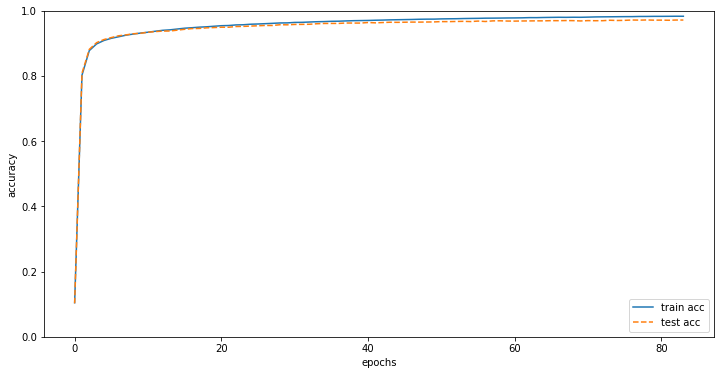

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

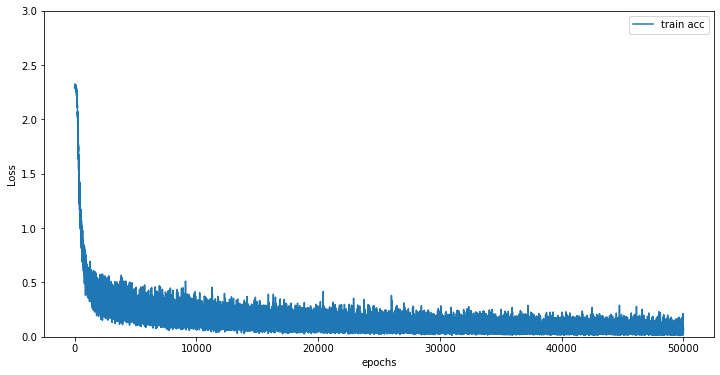

In [33]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()